### Import Libraries

In [1]:
import nltk 
nltk.download("all")
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import seaborn as sns
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


import string
string.punctuation
from nltk.stem import PorterStemmer
# init stemmer
porter_stemmer=PorterStemmer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

### Load Dataset

In [2]:
import csv
text_df = pd.read_csv("dataset.csv",engine='python', encoding='utf-8',error_bad_lines=False)
text_df.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [3]:
text_df = text_df.drop('id',axis=1)
print("Number of Duplicats :",text_df.duplicated().sum())
print("Removing Duplicats ......")
text_df = text_df.drop_duplicates()
print("Number of Duplicats :",text_df.duplicated().sum())

Number of Duplicats : 2432
Removing Duplicats ......
Number of Duplicats : 0


### Preprocessing


In [4]:
# 1- Remove @user
def remove_user(text):
  user = re.compile(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
  clean_text = user.sub(r'',text)
  return clean_text

# 2- Remove Punctuation
def remove_punctuation(text):
  without_punctuation ="".join(i for i in text if i not in string.punctuation)
  return without_punctuation

# 3- Lower Case
def lower_case(text):
  return text.lower()

# 4- Tokenize Text
def tokenization(text):
  tokens = re.split('W+',text)
  return tokens

def remove_numbers(text):
  nums = re.compile(r'\d+')
  clean_text = nums.sub(r'',text)
  return clean_text

# 5- Remove Stopwords
eng_stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  not_stopword = [i for i in text  if i not in eng_stopwords]
  return not_stopword


# Get Tweets Clean
def preprocess_tweets(text):
  tokens = word_tokenize(lower_case(remove_punctuation(remove_numbers(remove_user(text)))))
  return tokens

# def convert_str(list_text):
#   string = ''.join([str(item) for item in list_text])
#   return string

In [5]:
text_df["tokens"] = text_df['tweet'].apply(lambda x: preprocess_tweets(x))
text_df['tokens']

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, lyft, credit, i, cant, use, caus...
2                                  [bihday, your, majesty]
3        [model, i, love, u, take, with, u, all, the, t...
4                   [factsguide, society, now, motivation]
                               ...                        
31956    [off, fishing, tomorrow, carnt, wait, first, t...
31957                              [ate, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31961                       [thank, you, for, you, follow]
Name: tokens, Length: 29530, dtype: object

### Modelling
**Use any Advanced technique such as: word2vec, glove, RNNs ... etc**

In [6]:
len(text_df)

29530

In [7]:
! pip install gensim
! pip install nltk
#Importing libraries
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
import multiprocessing

from gensim.models import Word2Vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:

word_model = gensim.models.Word2Vec(text_df['tokens'], size=100, min_count=1, window=3, iter=100)
pretrained_weights = word_model.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
maxlen = 40
# Helpful Function
def word2idx(word):
  return word_model.wv.vocab[word].index

def idx2word(idx):
  return word_model.wv.index2word[idx]

# Features
features = np.zeros([len(text_df),maxlen], dtype=np.int32)

# Label
# label = np.zeros([len(text_df)], dtype=np.int32)


# Convertion 
for i, line in enumerate(text_df['tokens']):
  for t, token in enumerate(line[:-1]):
    features[i, t] = word2idx(token)
    # label[i] = word2idx(line[-1])

# print(label)
# print(label.shape)

In [10]:
print(features)
print(features.shape)

[[  32    2  234 ...    0    0    0]
 [ 158    7 5080 ...    0    0    0]
 [  49   27    0 ...    0    0    0]
 ...
 [   1   60 9044 ...    0    0    0]
 [ 990    1  118 ...    0    0    0]
 [ 157    4    7 ...    0    0    0]]
(29530, 40)


In [11]:
# Split Data
from sklearn.model_selection import train_test_split

x_train, x_test_val, y_train, y_test_val = train_test_split(features,text_df['label'],shuffle = True,test_size=0.3,random_state=42,stratify = text_df['label'])
x_val, x_test, y_val, y_test = train_test_split(x_test_val,y_test_val,shuffle = True,test_size=0.5,random_state=42)

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers


# model = models.Sequential()
# model.add(layers.Embedding(vocab_size, 128, input_length=maxlen))
# model.add(layers.LSTM(32))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.4))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(1, activation='sigmoid'))


model_lstm = models.Sequential()
model_lstm.add(layers.Embedding(vocab_size, 128))
model_lstm.add(layers.LSTM(100))
model_lstm.add(layers.Dense(1, activation='sigmoid'))
model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=[metrics.binary_accuracy]
)

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         5086208   
                                                                 
 lstm_1 (LSTM)               (None, 100)               91600     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,177,909
Trainable params: 5,177,909
Non-trainable params: 0
_________________________________________________________________


## model

In [15]:
history = model_lstm.fit(
    x_train, 
    y_train, 
    epochs = 5, 
    batch_size = 128,
    validation_data=(x_val, y_val)
)

Epoch 1/5
162/162 [==============================] - 5s 16ms/step - loss: 0.2685 - binary_accuracy: 0.9318 - val_loss: 0.2520 - val_binary_accuracy: 0.9309
Epoch 2/5
162/162 [==============================] - 2s 12ms/step - loss: 0.2474 - binary_accuracy: 0.9318 - val_loss: 0.2465 - val_binary_accuracy: 0.9309
Epoch 3/5
162/162 [==============================] - 1s 8ms/step - loss: 0.1854 - binary_accuracy: 0.9363 - val_loss: 0.1720 - val_binary_accuracy: 0.9384
Epoch 4/5
162/162 [==============================] - 1s 8ms/step - loss: 0.1418 - binary_accuracy: 0.9493 - val_loss: 0.1599 - val_binary_accuracy: 0.9474
Epoch 5/5
162/162 [==============================] - 1s 8ms/step - loss: 0.1214 - binary_accuracy: 0.9576 - val_loss: 0.1554 - val_binary_accuracy: 0.9503


#### Evaluation

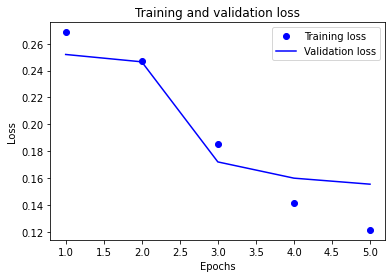

In [16]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [17]:
model_lstm.evaluate(x_test, y_test)

139/139 [==============================] - 1s 5ms/step - loss: 0.1543 - binary_accuracy: 0.9472


[0.15429240465164185, 0.947178304195404]

In [18]:
y_pred = model_lstm.predict(x_test)

In [19]:
y_pred_thresh = np.array(y_pred>= 0.5, dtype='int')

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4132
           1       0.67      0.43      0.52       298

    accuracy                           0.95      4430
   macro avg       0.81      0.71      0.75      4430
weighted avg       0.94      0.95      0.94      4430



## Similarity Visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


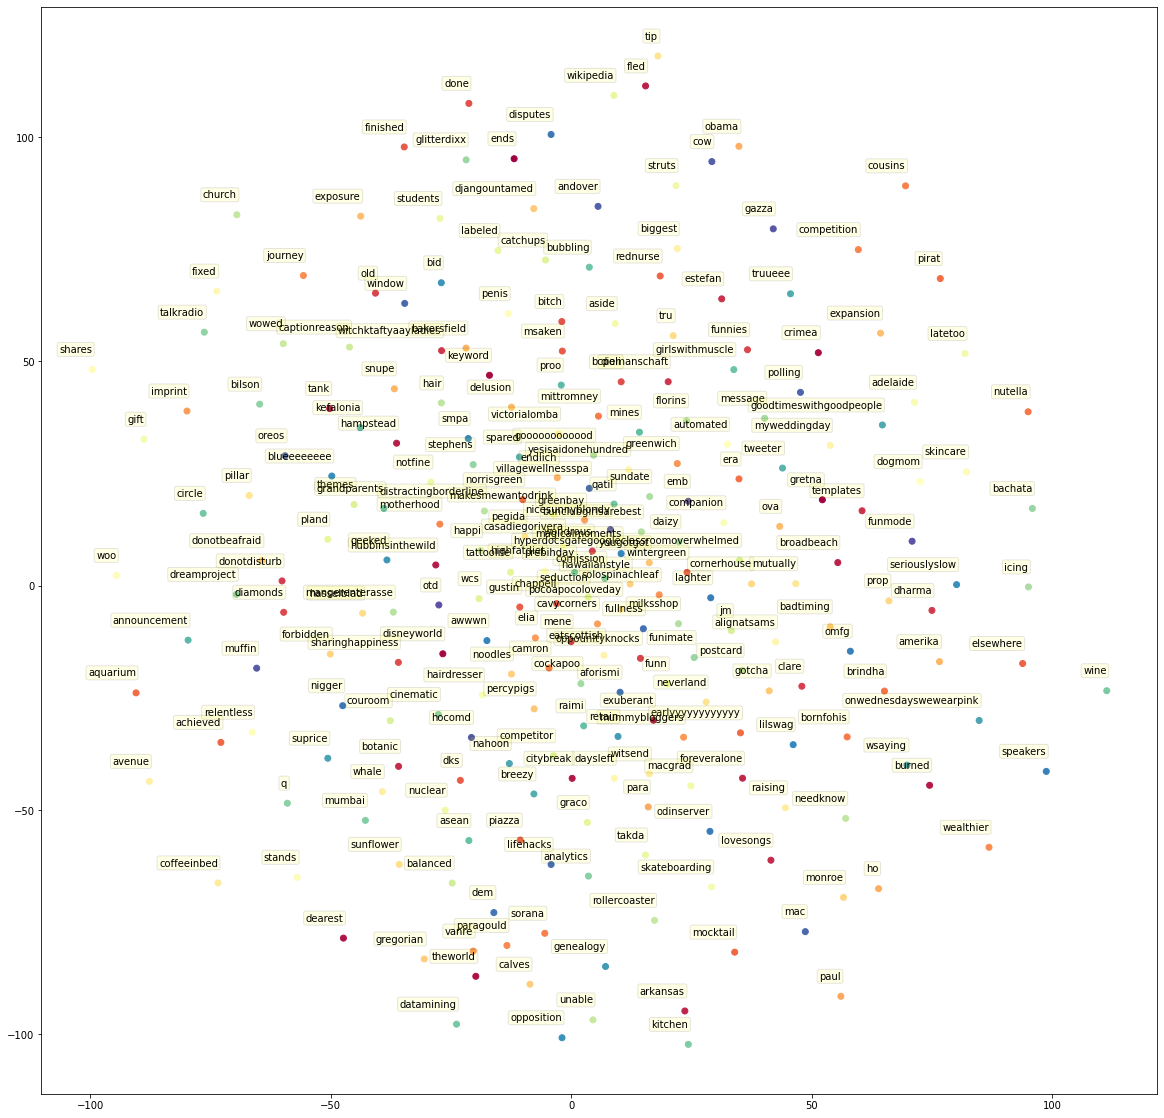

In [22]:

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

n_samples = 250


random_i = random.sample(range(vocab_size), n_samples)
random_w = [idx2word(i) for i in random_i]
word_vecs = np.array([word_model[w] for w in random_w])

# Apply t-SNE to Word2Vec embeddings, reducing to 2 dims
tsne = TSNE()
tsne_e = tsne.fit_transform(word_vecs)

# Plot t-SNE result
plt.figure(figsize=(20, 20))
plt.scatter(tsne_e[:, 0], tsne_e[:, 1], marker='o', c=range(len(random_w)), cmap=plt.get_cmap('Spectral'))

for label, x, y, in zip(random_w, tsne_e[:, 0], tsne_e[:, 1]):
    plt.annotate(label,
                 xy=(x, y), xytext=(0, 15),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round, pad=0.2', fc='yellow', alpha=0.1))

In [23]:
print('Result embedding shape:', pretrained_weights.shape)

print('Checking similar words:')

for word in ['father', 'happy', 'what', 'learn']:

  most_similar = ', '.join('%s (%.2f)' % (similar, dist) 

                           for similar, dist in word_model.most_similar(word)[:8])

  print('  %s -> %s' % (word, most_similar))

Result embedding shape: (39736, 100)
Checking similar words:
  father -> fathers (0.61), dad (0.58), life (0.52), daddy (0.50), god (0.48), man (0.46), son (0.46), he (0.41)
  happy -> great (0.53), its (0.51), a (0.50), what (0.50), this (0.50), you (0.49), the (0.48), i (0.48)
  what -> how (0.57), it (0.57), nothing (0.53), all (0.53), where (0.53), to (0.53), this (0.51), that (0.51)
  learn -> yourself (0.46), do (0.45), choose (0.45), help (0.44), share (0.43), tips (0.42), feel (0.41), ways (0.41)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


In [24]:
word_model.wv.most_similar("happy")

[('great', 0.5254412889480591),
 ('its', 0.5074206590652466),
 ('a', 0.5032247304916382),
 ('what', 0.4962763786315918),
 ('this', 0.49569904804229736),
 ('you', 0.4949992895126343),
 ('the', 0.4836330711841583),
 ('i', 0.4835011959075928),
 ('in', 0.48128998279571533),
 ('sad', 0.4805777072906494)]

In [25]:
word_model.wv.most_similar("tweet")

[('dayso', 0.44633206725120544),
 ('hear', 0.43923071026802063),
 ('say', 0.43368881940841675),
 ('call', 0.4255090355873108),
 ('post', 0.3985235095024109),
 ('talk', 0.38976016640663147),
 ('year', 0.38540834188461304),
 ('score', 0.3757909834384918),
 ('lens', 0.37520521879196167),
 ('except', 0.36860162019729614)]